<a href="https://colab.research.google.com/github/ameympatil/DSMP/blob/main/session_25_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included

### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

### 1. Relational Plot

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


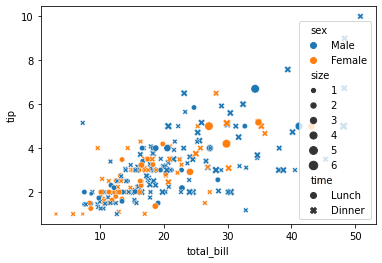

In [17]:
# scatter plot -> axes level function
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['time'],size=tips['size'])

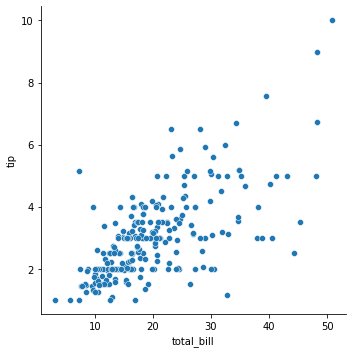

In [15]:
# relplot -> figure level function
sns.relplot(data=tips,x='total_bill',y='tip',kind='scatter')

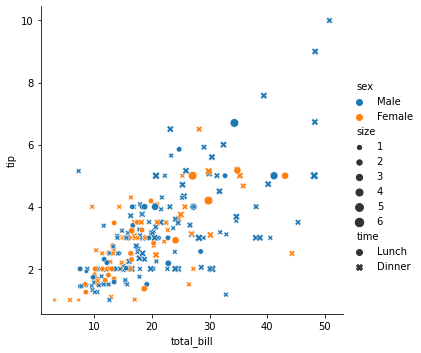

In [18]:
# scatter using relplot -> size and hue
sns.relplot(data=tips,x='total_bill',y='tip',kind='scatter',hue='sex',style='time',size='size')

In [ ]:
# style semantics

In [21]:
gap = px.data.gapminder()
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [24]:
temp_df = gap[gap['country'] == 'India']
temp_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
700,India,Asia,1972,50.651,567000000,724.032527,IND,356


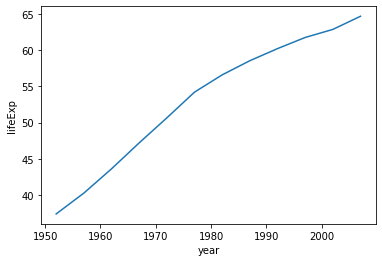

In [25]:
# line plot -> axes level
sns.lineplot(data=temp_df,x='year',y='lifeExp')

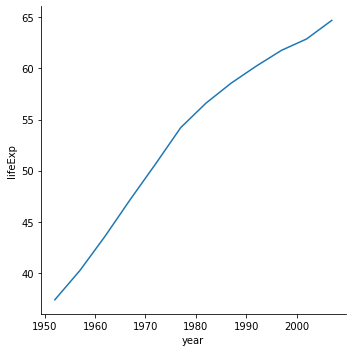

In [26]:
# using relpplot
sns.relplot(data=temp_df,x='year',y='lifeExp',kind='line')

In [32]:
# hue -> style
temp_df = gap[gap['country'].isin(['India','Brazil','Germany'])]
temp_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
168,Brazil,Americas,1952,50.917,56602560,2108.944355,BRA,76
169,Brazil,Americas,1957,53.285,65551171,2487.365989,BRA,76
170,Brazil,Americas,1962,55.665,76039390,3336.585802,BRA,76
171,Brazil,Americas,1967,57.632,88049823,3429.864357,BRA,76
172,Brazil,Americas,1972,59.504,100840058,4985.711467,BRA,76


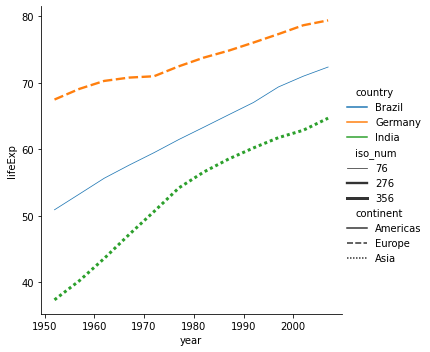

In [37]:
sns.relplot(kind='line',data=temp_df,x='year',y='lifeExp',hue='country',style='continent',size='iso_num')

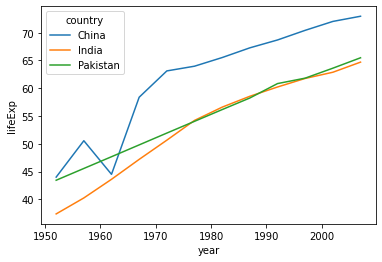

In [31]:
sns.lineplot(data=temp_df,x='year',y='lifeExp',hue='country')

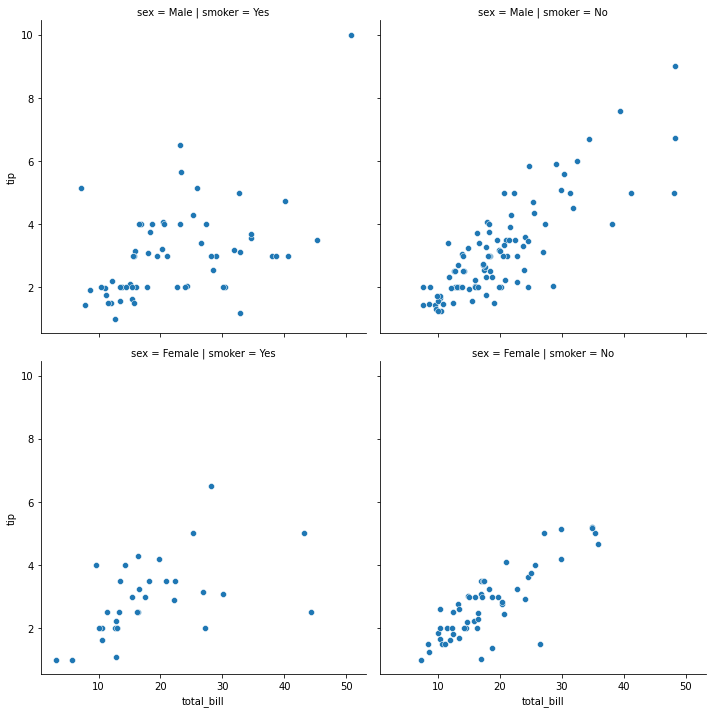

In [44]:
# facet plot -> figure level functions only (relplot)
# it will not work with scatterplot & lineplot
sns.relplot(kind='scatter',data=tips,x='total_bill',y='tip',row='sex',col='smoker')

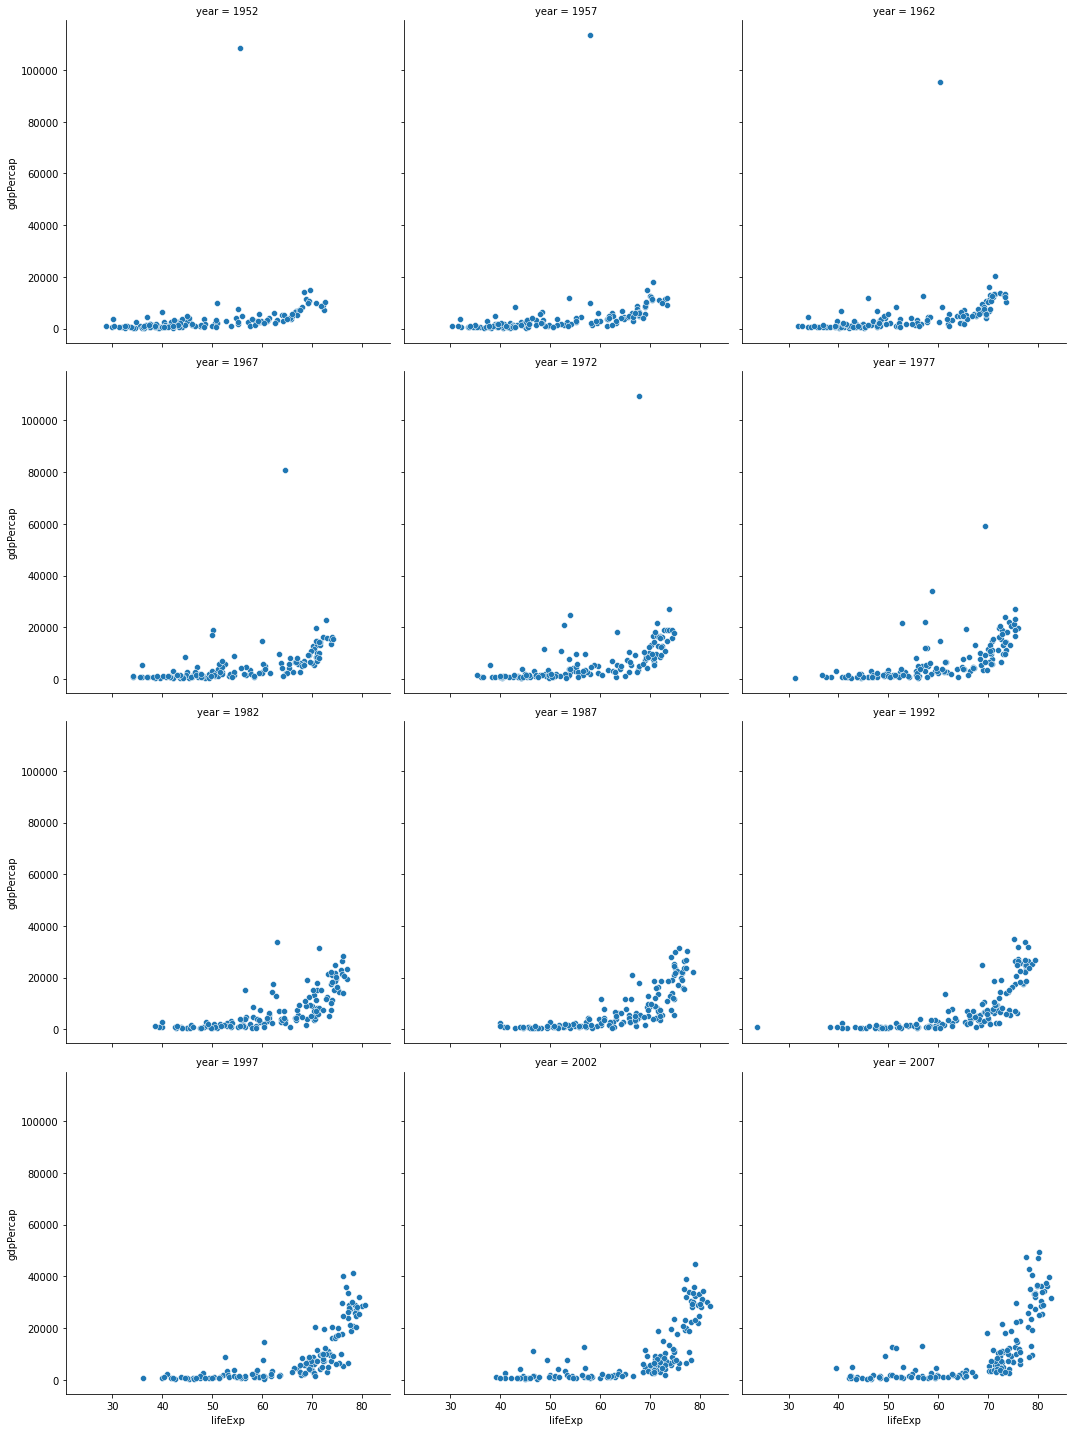

In [49]:
# col wrap
sns.relplot(kind='scatter',data=gap,x='lifeExp',y='gdpPercap',col='year',col_wrap=3)

### 2. Distribution Plots

- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

In [ ]:
# figure level -> displot
# axes level -> histplot, kdeplot, rugplot

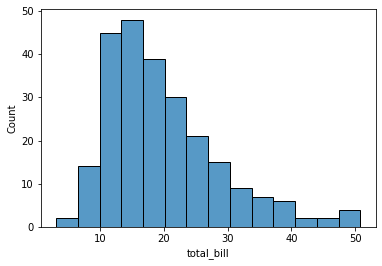

In [50]:
# plotting univariate histogram
# histplot -> axis level
sns.histplot(data=tips,x='total_bill')

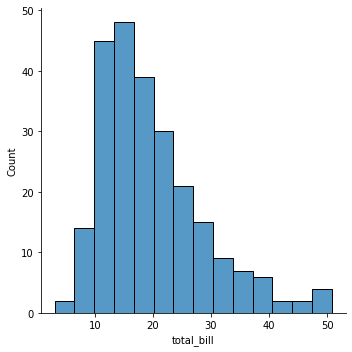

In [55]:
sns.displot(data=tips,x='total_bill',kind='hist')

In [ ]:
# bins parameter

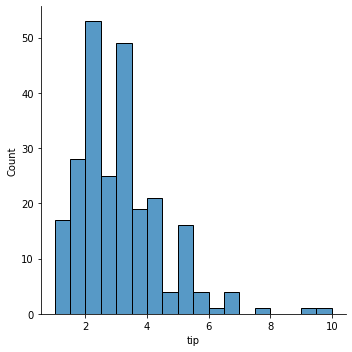

In [62]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. 
# Discrete bins are automatically set for categorical variables
sns.displot(data=tips,x='tip',kind='hist')

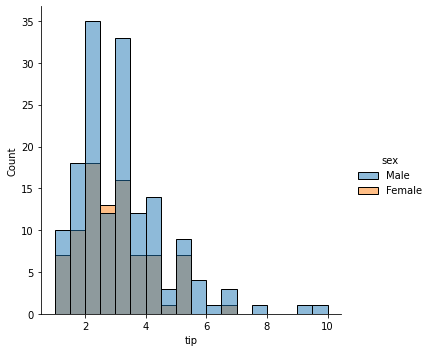

In [64]:
# hue parameter
sns.displot(data=tips,x='tip',kind='hist',hue='sex')

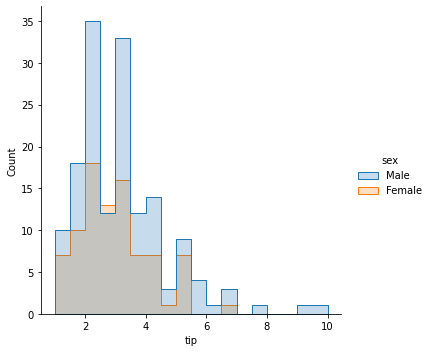

In [63]:
# element -> step
sns.displot(data=tips,x='tip',kind='hist',hue='sex',element='step')

In [66]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


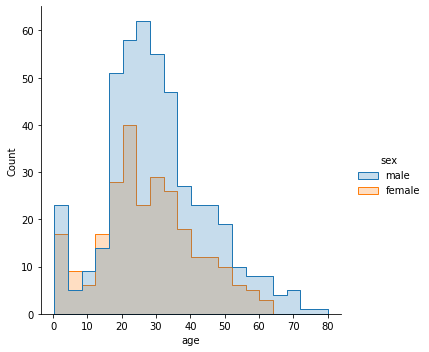

In [72]:
sns.displot(data=titanic,x='age',kind='hist',element='step',hue='sex')

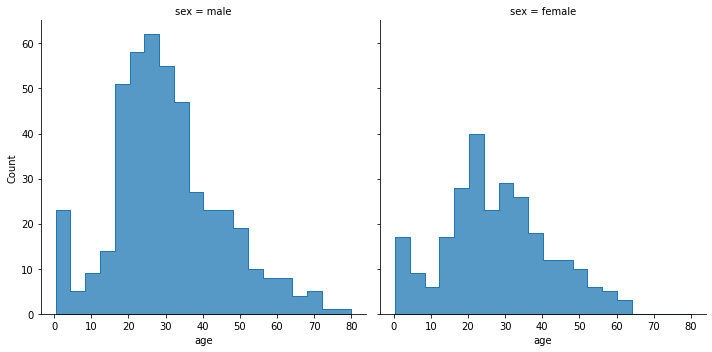

In [73]:
# faceting using col and row
sns.displot(data=titanic,x='age',kind='hist',element='step',col='sex')

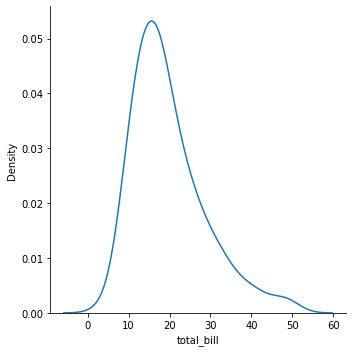

In [74]:
# kdeplot
# Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate
sns.displot(kind='kde',data=tips,x='total_bill')

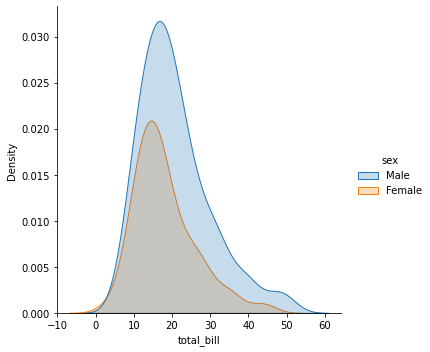

In [76]:
# hue -> fill
sns.displot(kind='kde',data=tips,x='total_bill',hue='sex',fill=True)

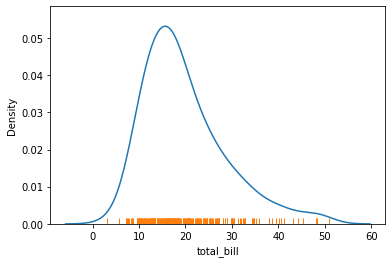

In [83]:
# Rugplot

# Plot marginal distributions by drawing ticks along the x and y axes.

# This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.
sns.kdeplot(data=tips,x='total_bill')
sns.rugplot(data=tips,x='total_bill')

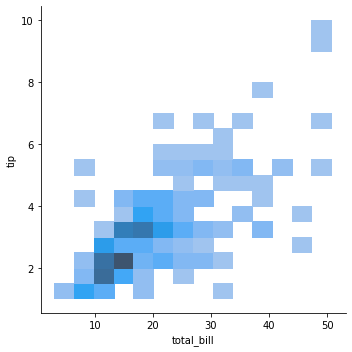

In [88]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot 
# and then shows the count of observations within each rectangle with the fill color

sns.displot(data=tips, x='total_bill', y='tip', kind='hist')

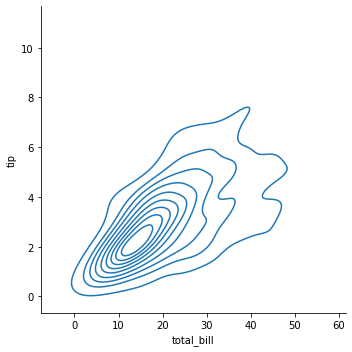

In [89]:
# Bivariate Kdeplot
# a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian

sns.displot(data=tips, x='total_bill', y='tip', kind='kde')

### 2. Matrix Plot

- Heatmap
- Clustermap

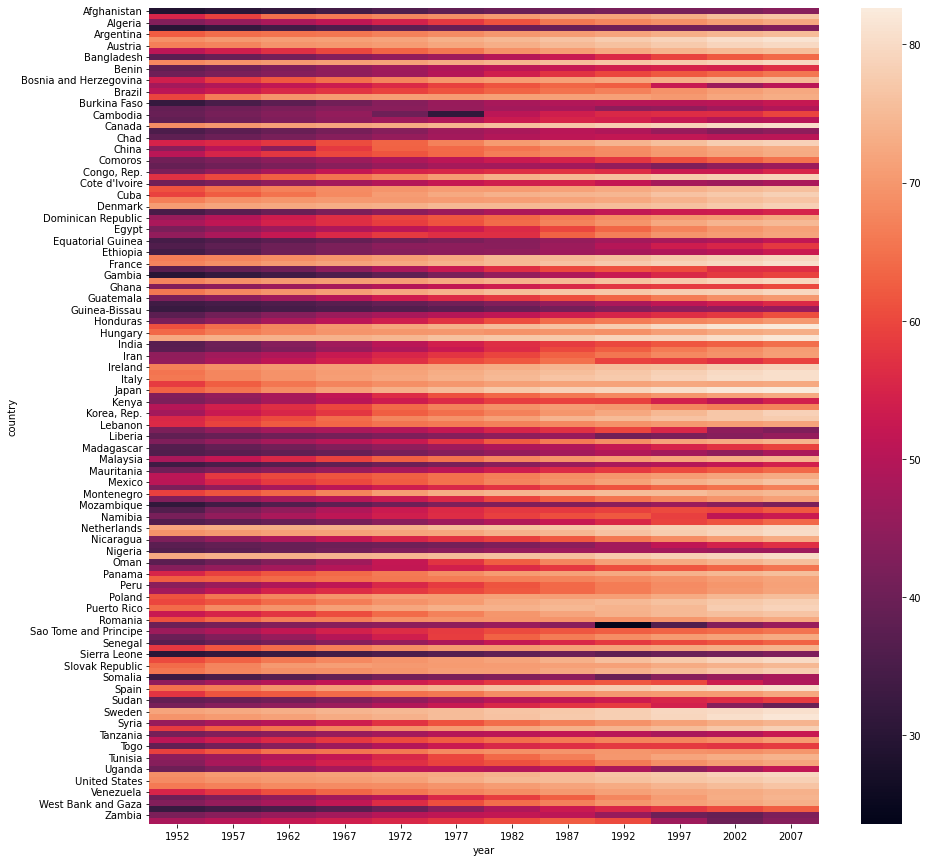

In [102]:
# Heatmap

# Plot rectangular data as a color-encoded matrix
temp_df = gap.pivot(index='country',columns='year',values='lifeExp')

#axes level -> heatmap
plt.figure(figsize=(15,15))
sns.heatmap(temp_df)

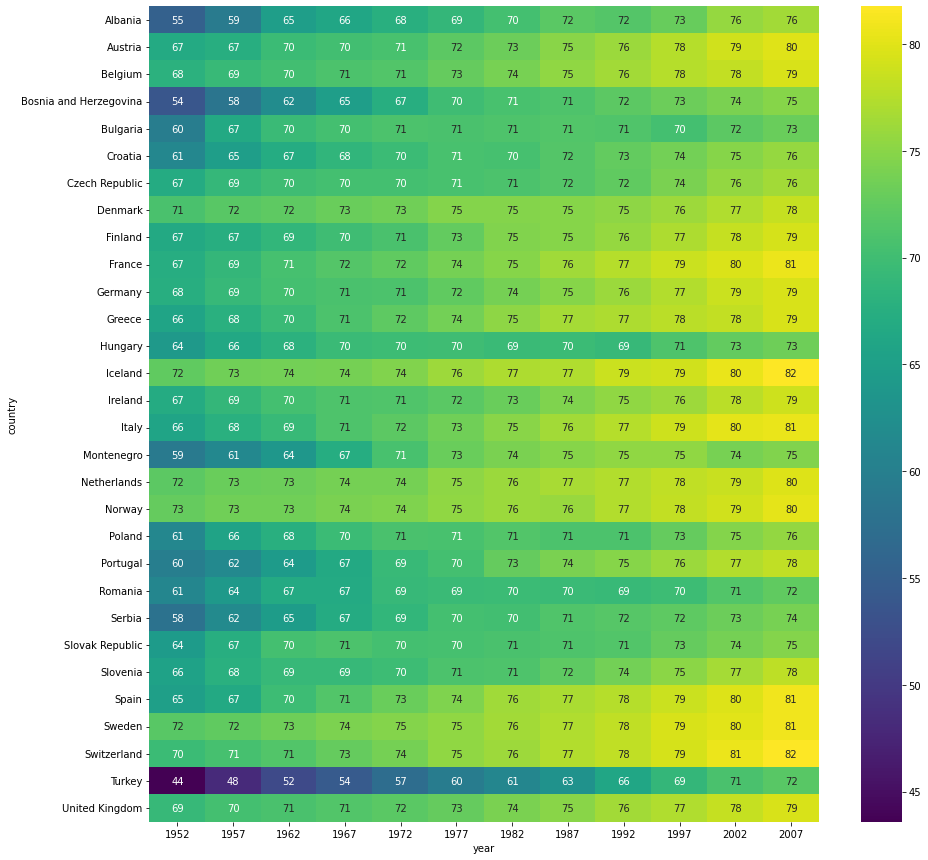

In [111]:
# annot
temp_df = gap[gap['continent'] == 'Europe']
temp_df = temp_df.pivot(index='country',columns='year',values='lifeExp')

plt.figure(figsize=(15,15))
sns.heatmap(temp_df,annot=True,cmap='viridis')

In [ ]:
# linewidth

In [ ]:
# cmap

In [114]:
# Clustermap

# Plot a matrix dataset as a hierarchically-clustered heatmap.

# This function requires scipy to be available.
iris = px.data.iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


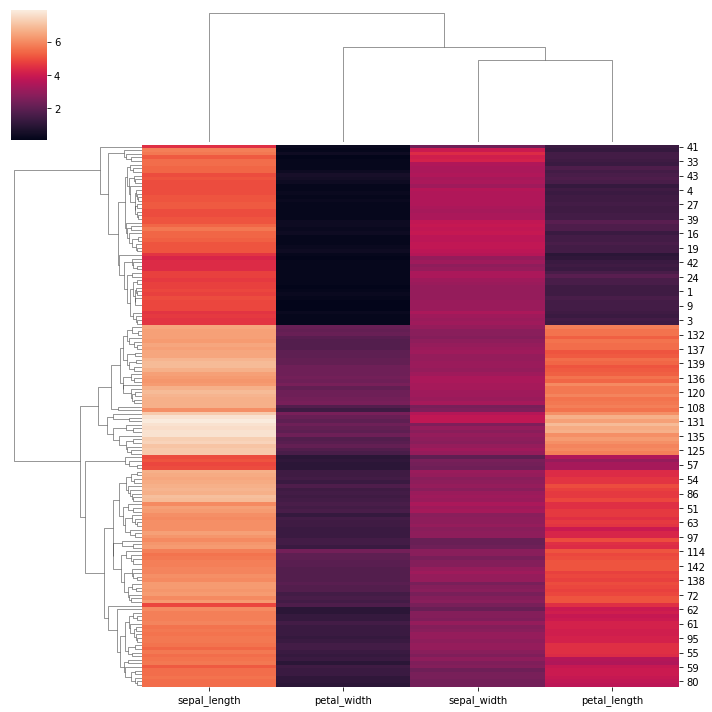

In [115]:
sns.clustermap(iris.iloc[:,:4])